In [ ]:
# DOWNLOAD DATASET (run it once)

from dotenv import load_dotenv
from roboflow import Roboflow
import os

# Load environment variables from the .env file
load_dotenv()

print("Starting Roboflow dataset download...")  # Add a print statement for debugging
api_key = os.getenv("ROBOFLOW_API_KEY")

rf = Roboflow(api_key)
project = rf.workspace("radai-id0w7").project("kidney-stone-ultrasound-ecckd-5fdji")
version = project.version(1)
dataset = version.download("yolov8")


Train Model

In [ ]:
import torch
from ultralytics import YOLO, checks, hub

if __name__ == '__main__':
    print(torch.cuda.is_available())
    print(torch.__version__)
    print("Running")

    # checks()

    # hub.login('3b5056ac3a9ea918ac838037d777446ba97e9ad3fc')

    # Load YOLOv8 model (choose your version)
    try:
        model = YOLO('yolov8n.pt')  # 'yolov8n.pt' for the nano version, faster for testing

        # Train the model with your dataset
        model.train(
            data='kidney-stone-ultrasound-1\\data.yaml',  # Path to dataset YAML
            epochs=20,  # Start with 20 epochs
            imgsz=320,  # Image size
            plots=True,
            batch=2
        )
    except RuntimeError as e:
        print(f"Caught a RuntimeError: {e}")
        print("It seems there was a CUDA-related issue. Freeing up memory and continuing.")

    except Exception as e:
    # This will catch any other general exceptions
        print(f"Caught an exception: {e}")
        print("An error occurred. Please check your code or environment.")
        
    finally:
        print("Clearing GPU Memory")
        torch.cuda.empty_cache()


Predict Model

Current Working Directory: c:\Users\kumur\Documents\radai

image 1/1 c:\Users\kumur\Documents\radai\kidney_stone.jpg: 640x640 (no detections), 46.0ms
Speed: 4.0ms preprocess, 46.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict5


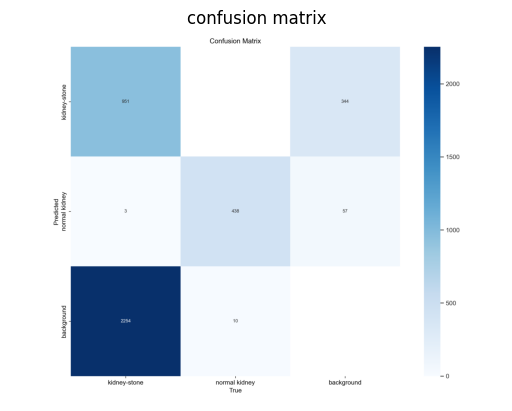

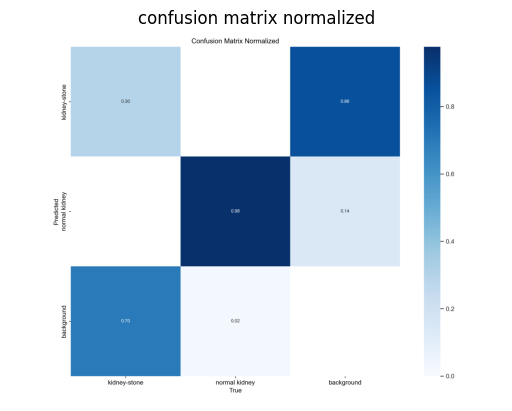

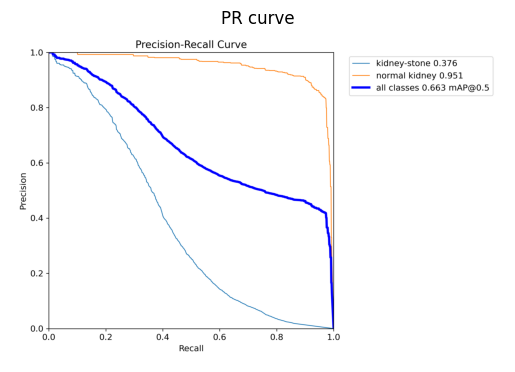

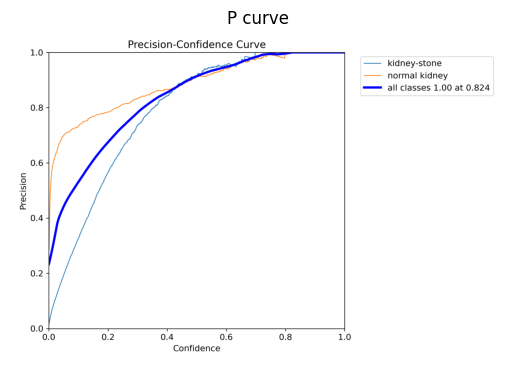

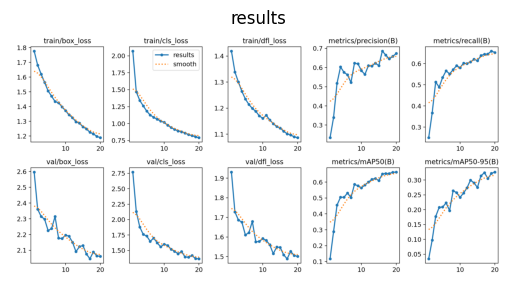

In [22]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Print the current working directory for debugging
print("Current Working Directory:", os.getcwd())

# Load the model
model = YOLO('best141124-1900.pt')

# Path to the input image
path = '.\\kidney_stone.jpg'

# Path to save the results
save_path = '..\\outputs\\'

# Run inference with a specified confidence threshold
results = model(source=path, conf=0.5, save=True, save_dir=save_path)

# Show the inference result (image with bounding boxes)
results[0].show()

# List of metric image paths
metric_paths = [
    'runs/detect/train2/confusion_matrix.png',
    'runs/detect/train2/confusion_matrix_normalized.png',
    'runs/detect/train2/PR_curve.png',
    'runs/detect/train2/P_curve.png',
    'runs/detect/train2/results.png'
]

# Loop through the list of metric images and display them if they exist
for metric_path in metric_paths:
    if os.path.exists(metric_path):
        # Read and display the metric image
        metric_image = plt.imread(metric_path)
        plt.imshow(metric_image)
        plt.title(os.path.basename(metric_path).replace('_', ' ').replace('.png', ''))
        plt.axis('off')  # Hide axes for cleaner display
        plt.show()
    else:
        print(f"Metric image not found: {metric_path}")
